In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import pandas as pd   
import numpy as np    
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt   
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = ... # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = ... # содержит только имя файла, без имен папок

wine_data = pd.read_csv('train.csv')
wine_data = wine_data.drop(['density','total sulfur dioxide'], axis=1 ) #удаляем из-за мультиколлинеарности


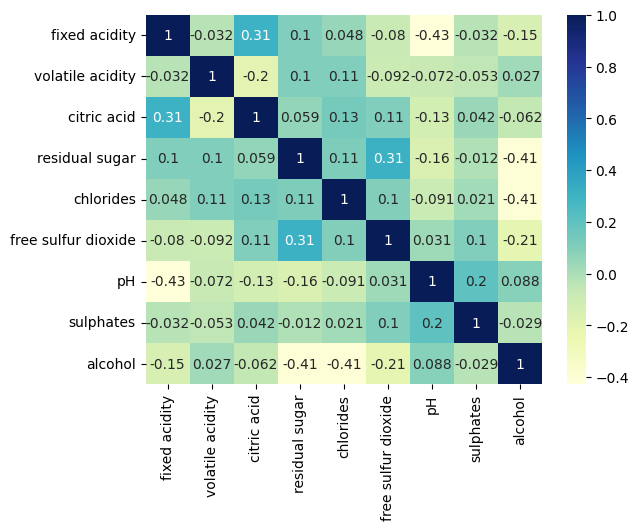

In [6]:
# Блок(и) обучения и поверки модели
y = wine_data['quality']
y.replace([1, 2, 3, 4, 5, 6], 0, inplace= True)
y.replace([7, 8, 9], 1, inplace= True)
X = wine_data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
wine_data.corr()
dataplot = sns.heatmap(X_train.corr(),  cmap="YlGnBu", annot=True, )
mp.show()

In [7]:
pipe_best = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2') )
pipe_best.fit(X_train,y_train)
pipe_best.score(X_train, y_train)


0.7564208782104391

In [8]:
# Блок предсказания с использованием тестового набора
y_pred_best = pipe_best.predict(X_test)
print("Тренировка: ", pipe_best.score(X_train,y_train), "   Тест : ", pipe_best.score(X_test,y_test))



Тренировка:  0.7564208782104391    Тест :  0.7432432432432432


<Axes: >

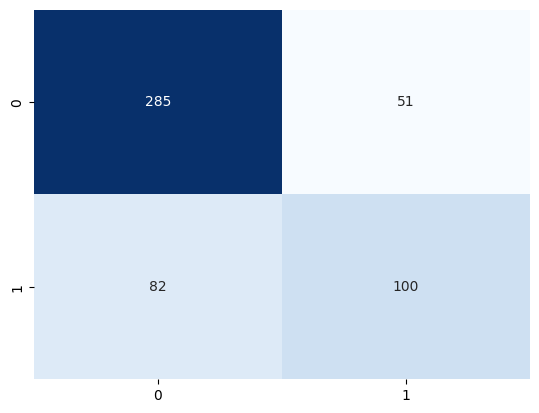

In [9]:
matrix=confusion_matrix(y_test,y_pred_best)
sns.heatmap(matrix,annot=True, fmt='g', cbar=None,cmap="Blues") #Будем использовать метрику presision, поскольку важно, насколько точно мы предсказываем целевой класс

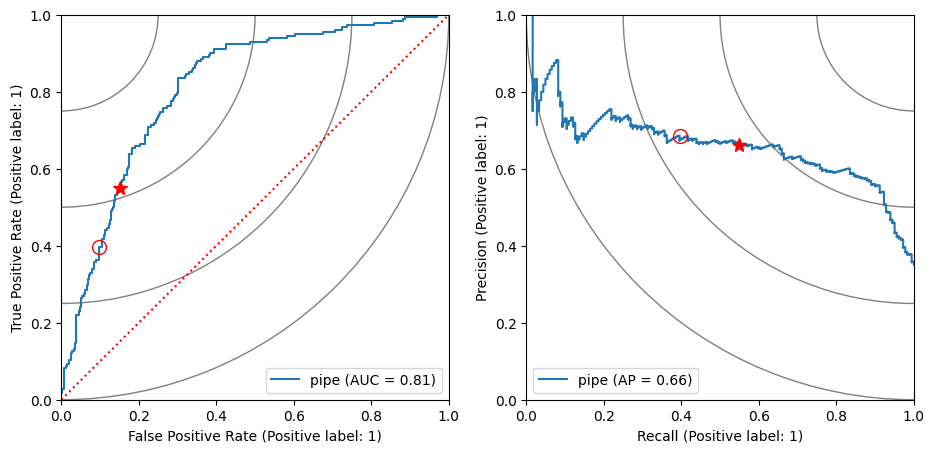

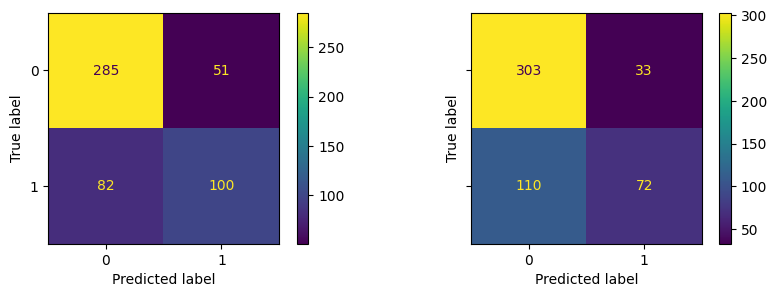

,precision,recall,f1-score,support
0,0.776567,0.848214,0.810811,336.000000
1,0.662252,0.549451,0.600601,182.000000
accuracy,0.743243,0.743243,0.743243,0.743243
macro avg,0.719409,0.698832,0.705706,518.000000
weighted avg,0.736402,0.743243,0.736953,518.000000
,precision,recall,f1-score,support
0,0.733656,0.901786,0.809079,336.000000
1,0.685714,0.395604,0.501742,182.000000
accuracy,0.723938,0.723938,0.723938,0.723938
macro avg,0.709685,0.648695,0.655410,518.000000


In [10]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

fpr, tpr, thresholds = roc_curve(y_test, pipe_best.predict_proba(X_test)[:,1], pos_label = None)
pos = 50
point = find_nearest(thresholds,0.5)

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(pipe_best, X_test, y_test, name = 'pipe', ax=ax1)

ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
ax1.add_patch(circle0)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

precision, recall, thresholds_pr = precision_recall_curve(y_test, pipe_best.predict_proba(X_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(pipe_best, X_test, y_test, name = 'pipe', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)  # найдем позицию порога вероятности 0.5
pos_pr = np.where(thresholds_pr>=thresholds[pos])[0][0] # найдем позицию порога для thresholds в позиции pos

ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
ax2.add_patch(circle0)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle3)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

y_thresholds = np.where(pipe_best.predict_proba(X_test)[:,1]>=thresholds[pos], 1, 0)

matrix_thresholds = confusion_matrix(y_test, y_thresholds)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,3))

ConfusionMatrixDisplay(matrix).plot(ax = ax1)
ConfusionMatrixDisplay(matrix_thresholds).plot(ax = ax2)
plt.show()


from IPython.display import display_html

df1 = pd.DataFrame(classification_report(y_test, y_pred_best, output_dict=True)).T
df2 = pd.DataFrame(classification_report(y_test, y_thresholds, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('pipe')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('pipe_thresholds')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [11]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
X_true = pd.read_csv('test.csv')
X_true = X_true.drop(['density','total sulfur dioxide'], axis=1 ) #удаляем из-за мультиколлинеарности
#display(X_true)
y_predict = pipe_best.predict(X_true)
y_thresholds = np.where(pipe_best.predict_proba(X_true)[:,1]>=thresholds[pos], 1, 0)
y_thresholds


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,

0.6833333333333333

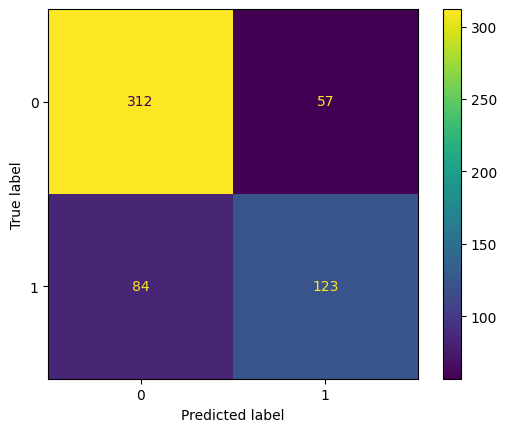

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)